In [24]:
import os
import glob
import tqdm
import csv
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [25]:
## Load imgs & labels files
## C:/OD/coco/images/train2017/*
train_imgs = glob.glob('coco/images/train2017/*', recursive=True)
val_imgs = glob.glob('coco/images/val2017/*', recursive=True)
test_imgs = glob.glob('coco/images/test2017/*', recursive=True)
train_labels = glob.glob('coco/labels/train2017/*', recursive=True)
val_labels = glob.glob('coco/labels/val2017/*', recursive=True)
print(f'학습 이미지 수 : {len(train_imgs)}, 학습 라벨 파일 수 : {len(train_labels)}')
print(f'검증 이미지 수 : {len(val_imgs)}, 검증 라벨 파일 수 : {len(val_labels)}')
print(f'테스트 이미지 수 {len(test_imgs)}')

학습 이미지 수 : 118287, 학습 라벨 파일 수 : 117266
검증 이미지 수 : 5000, 검증 라벨 파일 수 : 4952
테스트 이미지 수 40670


In [26]:
# 파일명 중복 체크
if len(train_imgs)==len(set(train_imgs)):
    print('학습 이미지 파일명 중복 없음')
if len(val_imgs)==len(set(val_imgs)):
    print('검증 이미지 파일명 중복 없음')
if len(test_imgs)==len(set(test_imgs)):
    print('테스트 이미지 파일명 중복 없음')
if len(train_labels)==len(set(train_labels)):
    print('학습 라벨 파일명 중복 없음')
if len(val_labels)==len(set(val_labels)):
    print('검증 라벨 파일명 중복 없음')

학습 이미지 파일명 중복 없음
검증 이미지 파일명 중복 없음
테스트 이미지 파일명 중복 없음
학습 라벨 파일명 중복 없음
검증 라벨 파일명 중복 없음


In [27]:
# Make obj_count dictionary
names=['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
       'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
       'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
       'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
       'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
       'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
       'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
       'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
       'hair drier', 'toothbrush']
train_cls_dict = dict(zip(names,[0 for i in range(len(names))]))

ni = 0 # number of instances
boxes = [] # x,y,w,h of all boxes
s_boxes = [] # area < 32**2 # Area is measured as the number of pixels
m_boxes = [] # 32**2 < area < 96**2
l_boxes = [] # 96**2 < area
for i,train_label_file in enumerate(train_labels):
    img_file = cv2.imread('coco/images/train2017/'+train_label_file.split(os.sep)[-1].replace('.txt','.jpg'))
    h, w = img_file.shape[:2]
    with open(train_label_file, 'r') as f:
       lines = f.read().splitlines()
       for obj_line in lines:
              obj = obj_line.split(" ")
              cls, box = int(obj[0]), list(map(float, obj[1:5]))
              box_area = int(w*box[2] * h*box[3])
              if box_area < 32**2:
                     s_boxes.append(box)
              elif(32**2 <= box_area < 96**2):
                     m_boxes.append(box)
              else:
                     l_boxes.append(box)
              train_cls_dict[names[cls]] += 1
              boxes.append(box) # cx, cy, w, h relative with img_size
              ni += 1
print(f'number of instances in train data : {ni}')
print(f'number of small_box : {len(s_boxes)}, {round(len(s_boxes)/len(boxes),3)*100}%\n\
number of medium_box : {len(m_boxes)}, {round(len(m_boxes)/len(boxes),3)*100}%\n\
number of large_box : {len(l_boxes)}, {round(len(l_boxes)/len(boxes),3)*100}%')

number of instances in train data : 849942
number of small_box : 267368, 31.5%
number of medium_box : 299073, 35.199999999999996%
number of large_box : 283501, 33.4%


In [28]:
val_cls_dict = dict(zip(names,[0 for i in range(len(names))]))
vni = 0 # number of instances
vboxes = [] # x,y,w,h of all boxes
vs_boxes = [] # area < 32**2 # Area is measured as the number of pixels
vm_boxes = [] # 32**2 < area < 96**2
vl_boxes = [] # 96**2 < area
for i,val_label_file in enumerate(val_labels):
    img_file = cv2.imread('coco/images/val2017/'+val_label_file.split(os.sep)[-1].replace('.txt','.jpg'))
    h, w = img_file.shape[:2]
    with open(val_label_file, 'r') as f:
       lines = f.read().splitlines()
       for obj_line in lines:
              obj = obj_line.split(" ")
              cls, box = int(obj[0]), list(map(float, obj[1:5]))
              box_area = int(w*box[2] * h*box[3])
              if box_area < 32**2:
                     vs_boxes.append(box)
              elif(32**2 <= box_area < 96**2):
                     vm_boxes.append(box)
              else:
                     vl_boxes.append(box)
              val_cls_dict[names[cls]] += 1
              vboxes.append(box) # cx, cy, w, h relative with img_size
              vni += 1
print(f'number of instances in validation data : {vni}')
print(f'number of small_box : {len(vs_boxes)}, {round(len(vs_boxes)/len(vboxes),3)*100}%\n\
number of medium_box : {len(vm_boxes)}, {round(len(vm_boxes)/len(vboxes),3)*100}%\n\
number of large_box : {len(vl_boxes)}, {round(len(vl_boxes)/len(vboxes),3)*100}%')

number of instances in validation data : 36335
number of small_box : 11454, 31.5%
number of medium_box : 12775, 35.199999999999996%
number of large_box : 12106, 33.300000000000004%


In [29]:
## Save cls_dict to .csv
with open("coco_train_cls.csv", 'w') as f:
    f.write(f'class,count\n')
    for k in train_cls_dict.keys():
        f.write(f'{k}, {train_cls_dict[k]}\n')
# w = csv.writer(open("coco_cls.csv", "w"))
# for k,v in cls_dict.items():
#     w.writerow([k, v]) ### 이렇게 하니까 한줄 건너띄워지는 현상 생김.

In [30]:
# Load csv to python dict
with open("coco_train_cls.csv", "r") as f:
    reader = csv.reader(f)
    train_cls_dict = {rows[0]:rows[1] for rows in reader}

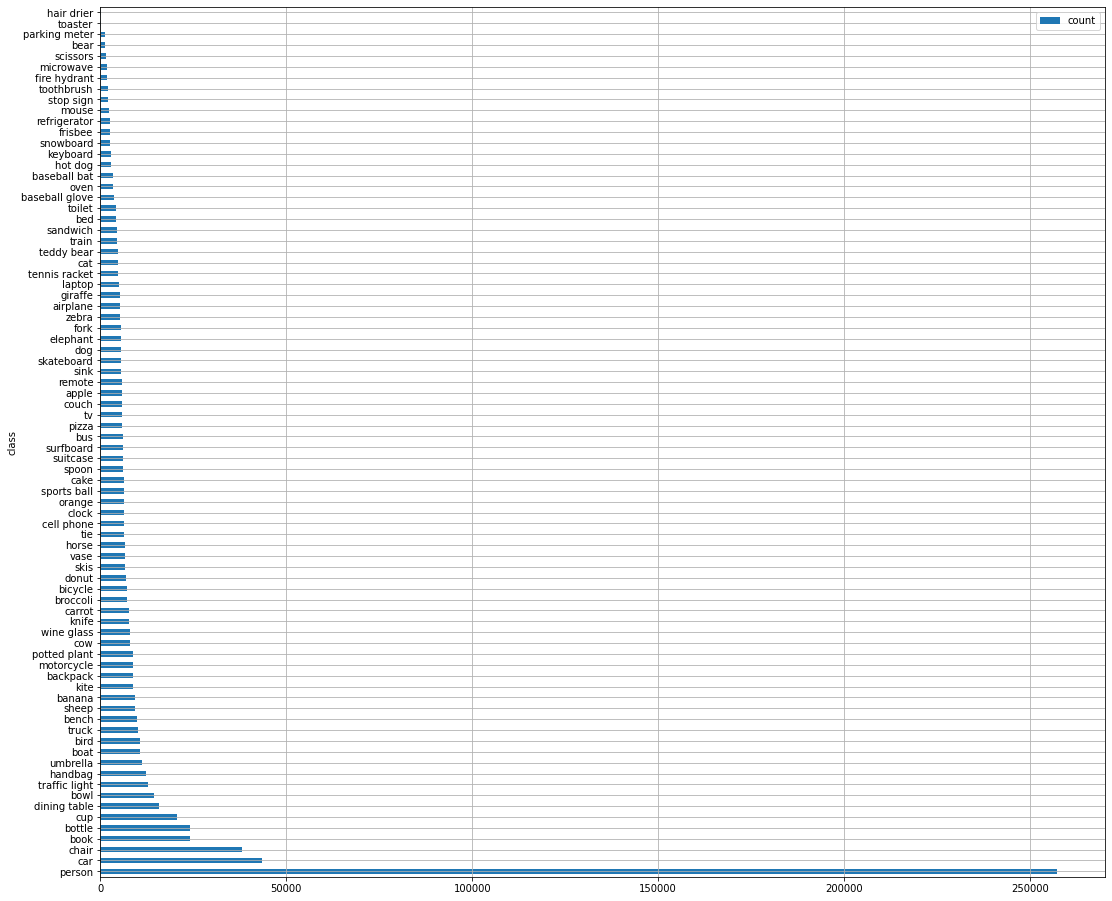

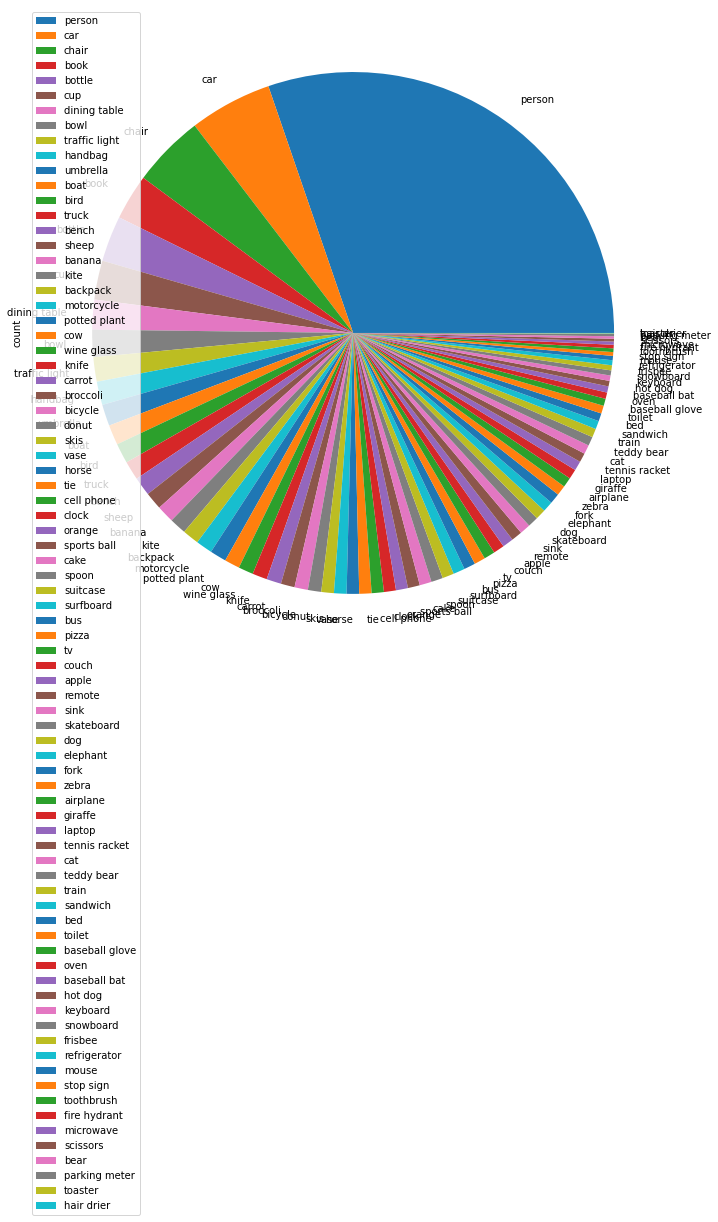

In [31]:
# Draw class distribution
train_cls_df = pd.read_csv('coco_train_cls.csv')
train_count = train_cls_df.sort_values(by=['count'], ascending=False)
bar = train_count.plot.barh(x='class', y='count', figsize=(18,16), grid=True)
pie = train_count.plot.pie(labels=train_count['class'].values.tolist(), y='count', figsize=(12,12))

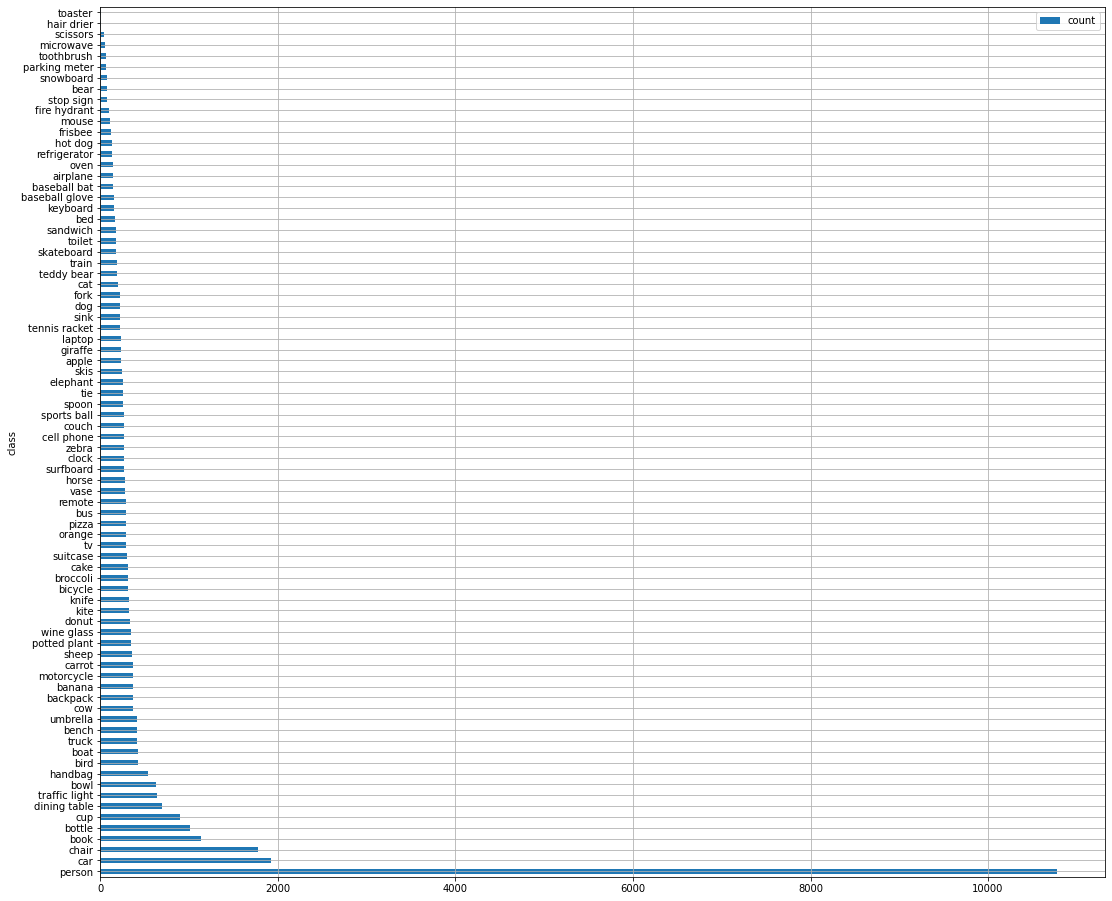

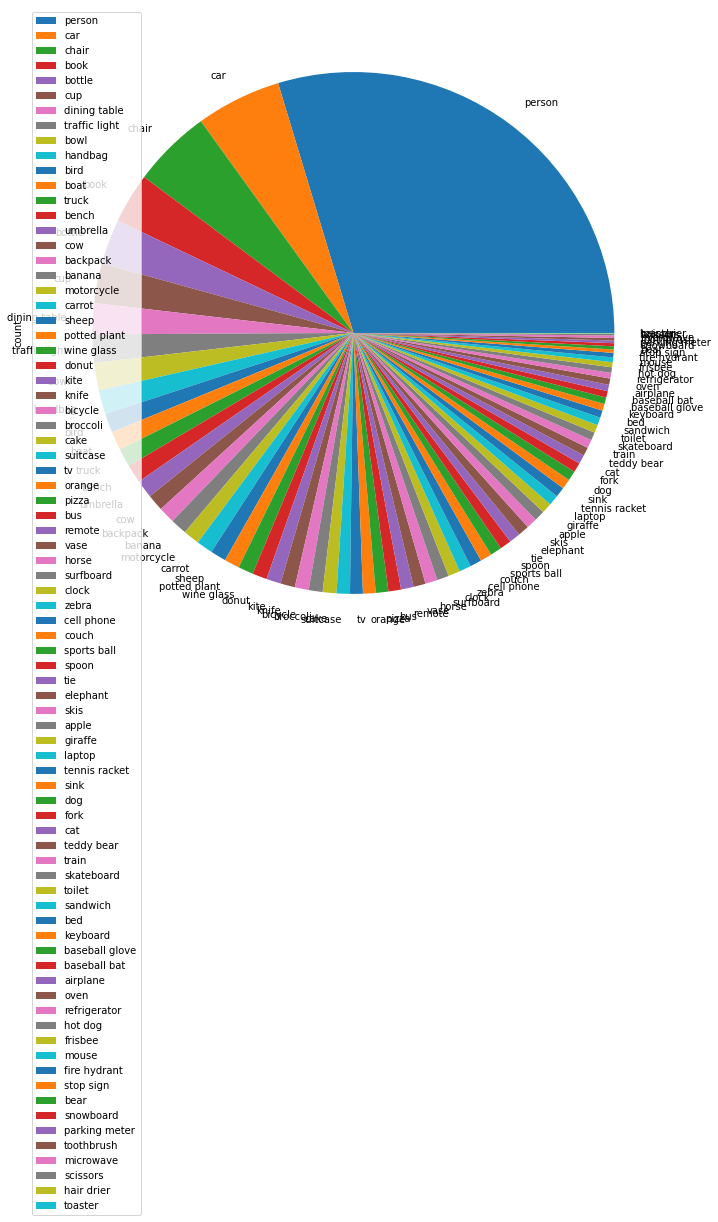

In [32]:
# About val
with open("coco_val_cls.csv", 'w') as f:
    f.write(f'class,count\n')
    for k in val_cls_dict.keys():
        f.write(f'{k}, {val_cls_dict[k]}\n')

val_cls_df = pd.read_csv('coco_val_cls.csv')
val_count = val_cls_df.sort_values(by=['count'], ascending=False)
bar = val_count.plot.barh(x='class', y='count', figsize=(18,16), grid=True)
pie = val_count.plot.pie(labels=val_count['class'].values.tolist(), y='count', figsize=(12,12))